In [83]:
import allel
from collections import namedtuple
import datetime
import h5py
import ingenos
import itertools
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import numpy as np
import pandas as pd
import re
import seaborn as sns
sns.set_style("white")
%matplotlib inline

##### set base directory

In [84]:
base = "/afs/crc.nd.edu/group/BesanskyNGS/data05/comp_karyo"

##### read in data for 2R

In [85]:
v_2R, g_2R = ingenos.import_data(
    "/afs/crc.nd.edu/group/BesanskyNGS2/inversion_genotyping/merged_p2_and_VObs_2R.h5", "2R")

##### read in data for 2L

In [86]:
path_2L = "/afs/crc.nd.edu/group/BesanskyNGS2/inversion_genotyping/merged_p2_and_VObs_2L.h5"
chrom_2L = "2L"

callset_2L = h5py.File(path_2L, mode='r')[chrom_2L]

v_2L = allel.VariantChunkedTable(callset_2L['variants'], index='POS',
                                names=['POS','REF','ALT','DP','MQ','QD','numalt'])

g_2L = allel.GenotypeChunkedArray(callset_2L['calldata']['GT'])

##### read in metadata

In [87]:
md_2R = pd.read_csv(base + "/metadata/all_samples_2R_metadata_annotated_sites_matching_052619.csv",
                    sep="\t")

md_2L = pd.read_csv(base + "/metadata/all_samples_2L_metadata_annotated_sites_matching_051019.csv",
                    sep="\t")

##### make booleans

In [88]:
non_outliers = ((md_2R["country"] != "Kenya") &
                (md_2R["country"] != "Gambia, The") &
                (md_2R["country"] != "Guinea-Bissau")).values

west = (md_2R["country"] != "Kenya").values

j_bool = ((md_2R["country"] != "Kenya") & (md_2R["country"] != "Gambia, The") &\
          (md_2R["country"] != "Guinea-Bissau") & (md_2R["country"] != "France") &\
         (md_2R["species"] == "An. gambiae")).values

d_bool = ((md_2R["country"] != "Kenya") & (md_2R["country"] != "Gambia, The") &\
          (md_2R["country"] != "Guinea-Bissau") &\
         (md_2R["species"] == "An. gambiae")).values

col_bool = ( (md_2R["ox_code"].isin(md_2R.loc[non_outliers,"ox_code"])) &\
                 (md_2R["species"] == "An. coluzzii"))

gam_bool = ( (md_2R["ox_code"].isin(md_2R.loc[non_outliers,"ox_code"])) &\
                 (md_2R["species"] == "An. gambiae"))

##### 2La

In [89]:
coords_2La, model_2La = ingenos.run_pca("2La", v_2L, g_2L)

##### identify those that are mismatched

In [90]:
flt_2La = ((md_2L["2La"] != "None") &\
           (md_2L["2La"] != md_2L["2La_assigned"].map(float).map(str)))

In [91]:
outliers_2La = md_2L.loc[flt_2La,"ox_code"].values

In [92]:
outliers_2La

array(['AJ0138-C', 'AJ0155-C', 'AN0064-C', 'AN0108-C', 'AN0217-C',
       'AN0287-C', 'AN0451-C', 'AN0424-C', 'VBS02011', 'VBS02016',
       'VBS02041', 'VBS02042'], dtype=object)

In [93]:
out_bool_a = (md_2L["ox_code"].isin(outliers_2La)).values
in_bool_a = (~ md_2L["ox_code"].isin(outliers_2La)).values

In [94]:
md_2La_in = md_2L.loc[in_bool_a,:]
md_2La_out = md_2L.loc[out_bool_a,:]

In [95]:
coords_2La_in = coords_2La[in_bool_a,:]
coords_2La_out = coords_2La[out_bool_a,:]

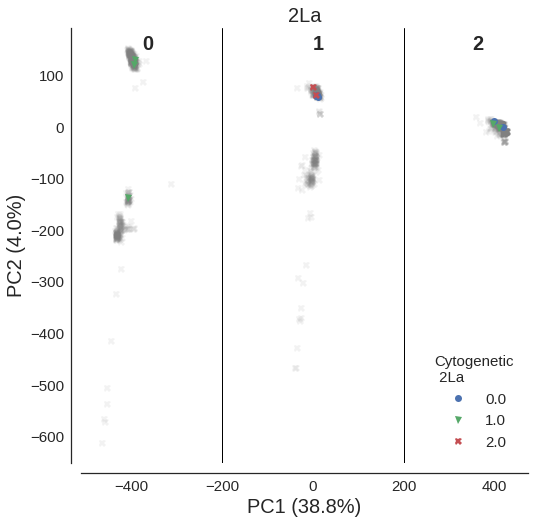

In [96]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2La_in["2La"].unique()):
            flt = (md_2La_in["2La"] == status).values
            ax.plot(coords_2La_in[:,0][flt], 
                    coords_2La_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=7, alpha=0.1)

ingenos.plot_pca_coords(coords_2La_out, model_2La, 0, 1, ax, md_2La_out,
                region = "2La", label_with = "2La",
               alpha = 1, title = "2La", markersize=7)

ax.text( -375, 150, "0", fontsize = 20, weight = 'bold')
ax.text( 0, 150, "1", fontsize = 20, weight = 'bold')
ax.text( 350, 150, "2", fontsize = 20, weight = 'bold')

ax.axvline(x = -200, color = 'k', linewidth = 1)
ax.axvline(x = 200, color = 'k', linewidth = 1)
plt.title("2La", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2La", fontsize=15)
legend.get_title().set_fontsize('15')

plt.savefig(ingenos.make_date_stamp(
    base + "/data/results/2La_karyotyping_PCA_outliers_marked_reverse"));

##### 2Rb

In [97]:
coords_2Rb, model_2Rb = ingenos.run_pca("2Rb", v_2R, g_2R, samples_bool = west)

##### identify those that are mismatched

In [98]:
flt_2Rb = ((md_2R["2Rb"] != "None") &\
           (md_2R["2Rb"] != md_2R["2Rb_assigned"].map(float).map(str)))

In [99]:
outliers_2Rb = md_2R.loc[flt_2Rb,"ox_code"].values

In [100]:
outliers_2Rb

array(['AN0083-C', 'AN0084-C', 'AN0104-C', 'AN0117-C', 'AN0210-C',
       'AN0297-C', 'AN0298-C', 'AN0305-C', 'AB0315-C', 'AB0316-C',
       'VBS02011', 'VBS02016'], dtype=object)

In [101]:
out_bool_b = (md_2R.loc[west,"ox_code"].isin(outliers_2Rb)).values
in_bool_b = (~ (md_2R.loc[west,"ox_code"].isin(outliers_2Rb))).values

md_2Rb_in = md_2R.loc[west,:].loc[in_bool_b,:]
md_2Rb_out = md_2R.loc[west,:].loc[out_bool_b,:]

coords_2Rb_in = coords_2Rb[in_bool_b,:]
coords_2Rb_out = coords_2Rb[out_bool_b,:]

'plt.savefig(ingenos.make_date_stamp(\n    base + "/data/results/2Rb_karyotyping_PCA_outliers_marked_reverse"));'

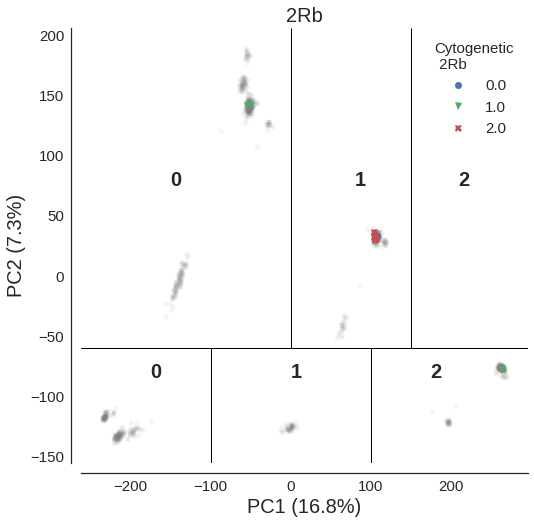

In [102]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)
sns.set_style("white")

for index, status in enumerate(md_2Rb_in["2Rb"].unique()):
            flt = (md_2Rb_in["2Rb"] == status).values
            ax.plot(coords_2Rb_in[:,0][flt], 
                    coords_2Rb_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.1)

ingenos.plot_pca_coords(coords_2Rb_out, model_2Rb, 0, 1, ax, md_2Rb_out,
                region = "2Rb", label_with = "2Rb",
               alpha = 1, title = "2Rb", markersize=7)

ax.text( -150, 75, "0", fontsize = 20, weight = 'bold')
ax.text( 80, 75, "1", fontsize = 20, weight = 'bold')
ax.text( 210, 75, "2", fontsize = 20, weight = 'bold')
ax.text( -175, -85, "0", fontsize = 20, weight = 'bold')
ax.text( 0, -85, "1", fontsize = 20, weight = 'bold')
ax.text( 175, -85, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -60, color = 'k', linewidth = 1)
ymin, ymax = ax.get_ylim()
plt.vlines(-100, ymin, -60, color='k', linewidth = 1)
plt.vlines(100, ymin, -60, color='k', linewidth = 1)
plt.vlines(0, ymax, -60, color='k', linewidth = 1)
plt.vlines(150, ymax, -60, color='k', linewidth = 1)

ax.set_ylim(bottom=ymin, top=ymax)

plt.title("2Rb", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rb", fontsize=15)
legend.get_title().set_fontsize('15')

plt.savefig(ingenos.make_date_stamp(
    base + "/data/results/2Rb_karyotyping_PCA_outliers_marked_reverse"));

##### 2Rc

In [103]:
coords_2Rc, model_2Rc = ingenos.run_pca("2Rc", v_2R, g_2R, samples_bool=non_outliers)

##### identify mismatches

In [104]:
flt_2Rc = ((md_2R["2Rc"] != "None") &\
           ((md_2R["species"] == "An. coluzzii") &\
            (md_2R["2Rc"] != md_2R["2Rc_col_assigned"].map(float).map(str) ) |\
           ((md_2R["species"] == "An. gambiae") &\
            (md_2R["2Rc"] != md_2R["2Rc_gam_assigned"].map(float).map(str)))))

In [105]:
md_2R.loc[flt_2Rc,"ox_code"].values

array(['AN0063-C', 'AN0075-C', 'AN0076-C', 'AN0105-C', 'AN0109-C',
       'AN0111-C', 'AN0112-C', 'AN0188-C', 'AB0313-C', 'AZ0253-C',
       'AZ0254-C', 'AZ0256-C', 'AZ0257-C', 'AZ0260-C', 'AZ0261-C',
       'AZ0262-C', 'AZ0267-C', 'AZ0283-C', 'VBS02011', 'VBS02016',
       'VBS02057', 'VBS02077', 'VBS02083', 'VBS02088', 'VBS02093',
       'VBS02094', 'VBS02096', 'VBS02097', 'VBS02100', 'VBS02103',
       'VBS02104', 'VBS02106', 'VBS02110', 'VBS02113', 'VBS02114',
       'VBS02115', 'VBS02119', 'VBS02128', 'VBS02130', 'VBS02132'],
      dtype=object)

In [106]:
outliers_2Rc = md_2R.loc[flt_2Rc,"ox_code"].values

In [107]:
out_bool_c = (md_2R.loc[non_outliers,"ox_code"].isin(outliers_2Rc)).values
in_bool_c = (~ md_2R.loc[non_outliers,"ox_code"].isin(outliers_2Rc)).values

md_2Rc_in = md_2R.loc[non_outliers,:].loc[in_bool_c,:]
md_2Rc_out = md_2R.loc[non_outliers,:].loc[out_bool_c,:]

coords_2Rc_in = coords_2Rc[in_bool_c,:]
coords_2Rc_out = coords_2Rc[out_bool_c,:]

##### visualize in reverse

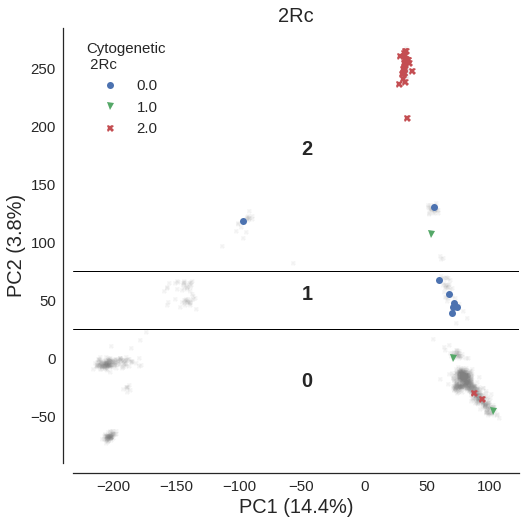

In [108]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Rc_in["2Rc"].unique()):
            flt = (md_2Rc_in["2Rc"] == status).values
            ax.plot(coords_2Rc_in[:,0][flt], 
                    coords_2Rc_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.1)

ingenos.plot_pca_coords(coords_2Rc_out, model_2Rc, 0, 1, ax, md_2Rc_out,
                region = "2Rc", label_with = "2Rc",
               alpha = 1, title = "2Rc", markersize=7)

ax.text( -50, -25, "0", fontsize = 20, weight = 'bold')
ax.text( -50, 50, "1", fontsize = 20, weight = 'bold')
ax.text( -50, 175, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = 75, color = 'k', linewidth = 1)
ax.axhline(y = 25, color = 'k', linewidth = 1)

plt.title("2Rc", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rc", fontsize=15)
legend.get_title().set_fontsize('15')

plt.savefig(ingenos.make_date_stamp(
    base + "/data/results/2Rc_karyotyping_PCA_outliers_marked_reverse"));

##### no cytogenetic-computational mismatches in 2Rj

##### 2Rd

In [109]:
d_sites_expression = '( (POS > 41000000) & (POS < 42375004) )'

In [110]:
d_sites_bool = v_2R.eval(d_sites_expression)

In [111]:
np.sum(d_sites_bool)

217929

In [112]:
two_Rd_alt_alleles, two_Rd_which_alleles = ingenos.filter_and_convert_genotypes(g_2R,
                                            sites_boolean = d_sites_bool,
                                            samples_boolean = d_bool,
                                            min_count = 3,
                                            variance_threshold = 0.03)

In [113]:
coords_2Rd, model_2Rd = allel.pca(two_Rd_alt_alleles)

##### identify outliers

In [114]:
flt_2Rd = ((md_2R["2Rd"] != "None") &\
           (md_2R["2Rd"] != md_2R["2Rd_assigned"].map(float).map(str)))

In [115]:
outliers_2Rd = md_2R.loc[flt_2Rd,"ox_code"].values

In [116]:
out_bool_d = (md_2R.loc[d_bool,"ox_code"].isin(outliers_2Rd)).values
in_bool_d = (~ md_2R.loc[d_bool,"ox_code"].isin(outliers_2Rd)).values

md_2Rd_in = md_2R.loc[d_bool,:].loc[in_bool_d,:]
md_2Rd_out = md_2R.loc[d_bool,:].loc[out_bool_d,:]

coords_2Rd_in = coords_2Rd[in_bool_d,:]
coords_2Rd_out = coords_2Rd[out_bool_d,:]

##### and in reverse

'plt.savefig(ingenos.make_date_stamp(\n    base + "/data/results/2Rd_karyotyping_PCA_outliers_marked_reverse"));'

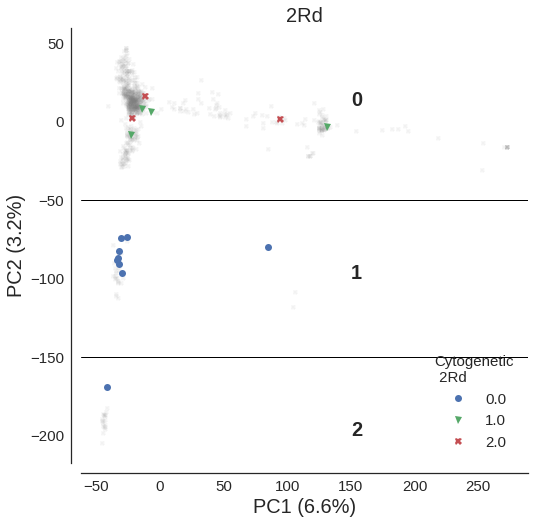

In [117]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Rd_in["2Rd"].unique()):
            flt = (md_2Rd_in["2Rd"] == status).values
            ax.plot(coords_2Rd_in[:,0][flt], 
                    coords_2Rd_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.1)

ingenos.plot_pca_coords(coords_2Rd_out, model_2Rd, 0, 1, ax, md_2Rd_out,
                region = "2Rd", label_with = "2Rd",
               alpha = 1, title = "2Rd", markersize=7)

ax.text( 150, 10, "0", fontsize = 20, weight = 'bold')
ax.text( 150, -100, "1", fontsize = 20, weight = 'bold')
ax.text( 150, -200, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -50, color = 'k', linewidth = 1)
ax.axhline(y = -150, color = 'k', linewidth = 1)

plt.title("2Rd", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rd", fontsize=15)
legend.get_title().set_fontsize('15')

plt.savefig(ingenos.make_date_stamp(
    base + "/data/results/2Rd_karyotyping_PCA_outliers_marked_reverse"));

##### 2Ru

In [118]:
coords_2Ru, model_2Ru = ingenos.run_pca("2Ru", v_2R, g_2R, samples_bool=non_outliers)

##### identify outliers

In [119]:
flt_2Ru = ((md_2R["2Ru"] != "None") &\
           (md_2R["2Ru"] != md_2R["2Ru_assigned"].map(float).map(str)))

In [120]:
outliers_2Ru = md_2R.loc[flt_2Ru,"ox_code"].values

In [121]:
out_bool_u = (md_2R.loc[non_outliers,"ox_code"].isin(outliers_2Ru)).values
in_bool_u = (~ md_2R.loc[non_outliers,"ox_code"].isin(outliers_2Ru)).values

md_2Ru_in = md_2R.loc[non_outliers,:].loc[in_bool_u,:]
md_2Ru_out = md_2R.loc[non_outliers,:].loc[out_bool_u,:]

coords_2Ru_in = coords_2Ru[in_bool_u,:]
coords_2Ru_out = coords_2Ru[out_bool_u,:]

'plt.savefig(ingenos.make_date_stamp(\n    base + "/data/results/2Ru_karyotyping_PCA_outliers_marked_reverse"));'

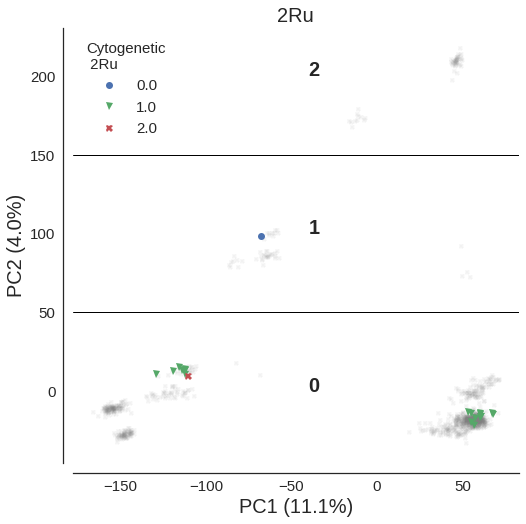

In [122]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Ru_in["2Ru"].unique()):
            flt = (md_2Ru_in["2Ru"] == status).values
            ax.plot(coords_2Ru_in[:,0][flt], 
                    coords_2Ru_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.1)

ingenos.plot_pca_coords(coords_2Ru_out, model_2Ru, 0, 1, ax, md_2Ru_out,
                region = "2Ru", label_with = "2Ru",
               alpha = 1, title = "2Ru", markersize=7)

ax.text( -40, 0, "0", fontsize = 20, weight = 'bold')
ax.text( -40, 100, "1", fontsize = 20, weight = 'bold')
ax.text( -40, 200, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = 150, color = 'k', linewidth = 1)
ax.axhline(y = 50, color = 'k', linewidth = 1)

plt.title("2Ru", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Ru", fontsize=15)
legend.get_title().set_fontsize('15')

plt.savefig(ingenos.make_date_stamp(
    base + "/data/results/2Ru_karyotyping_PCA_outliers_marked_reverse"));

##### put these all together

(0.0, 1.0, 0.0, 1.0)

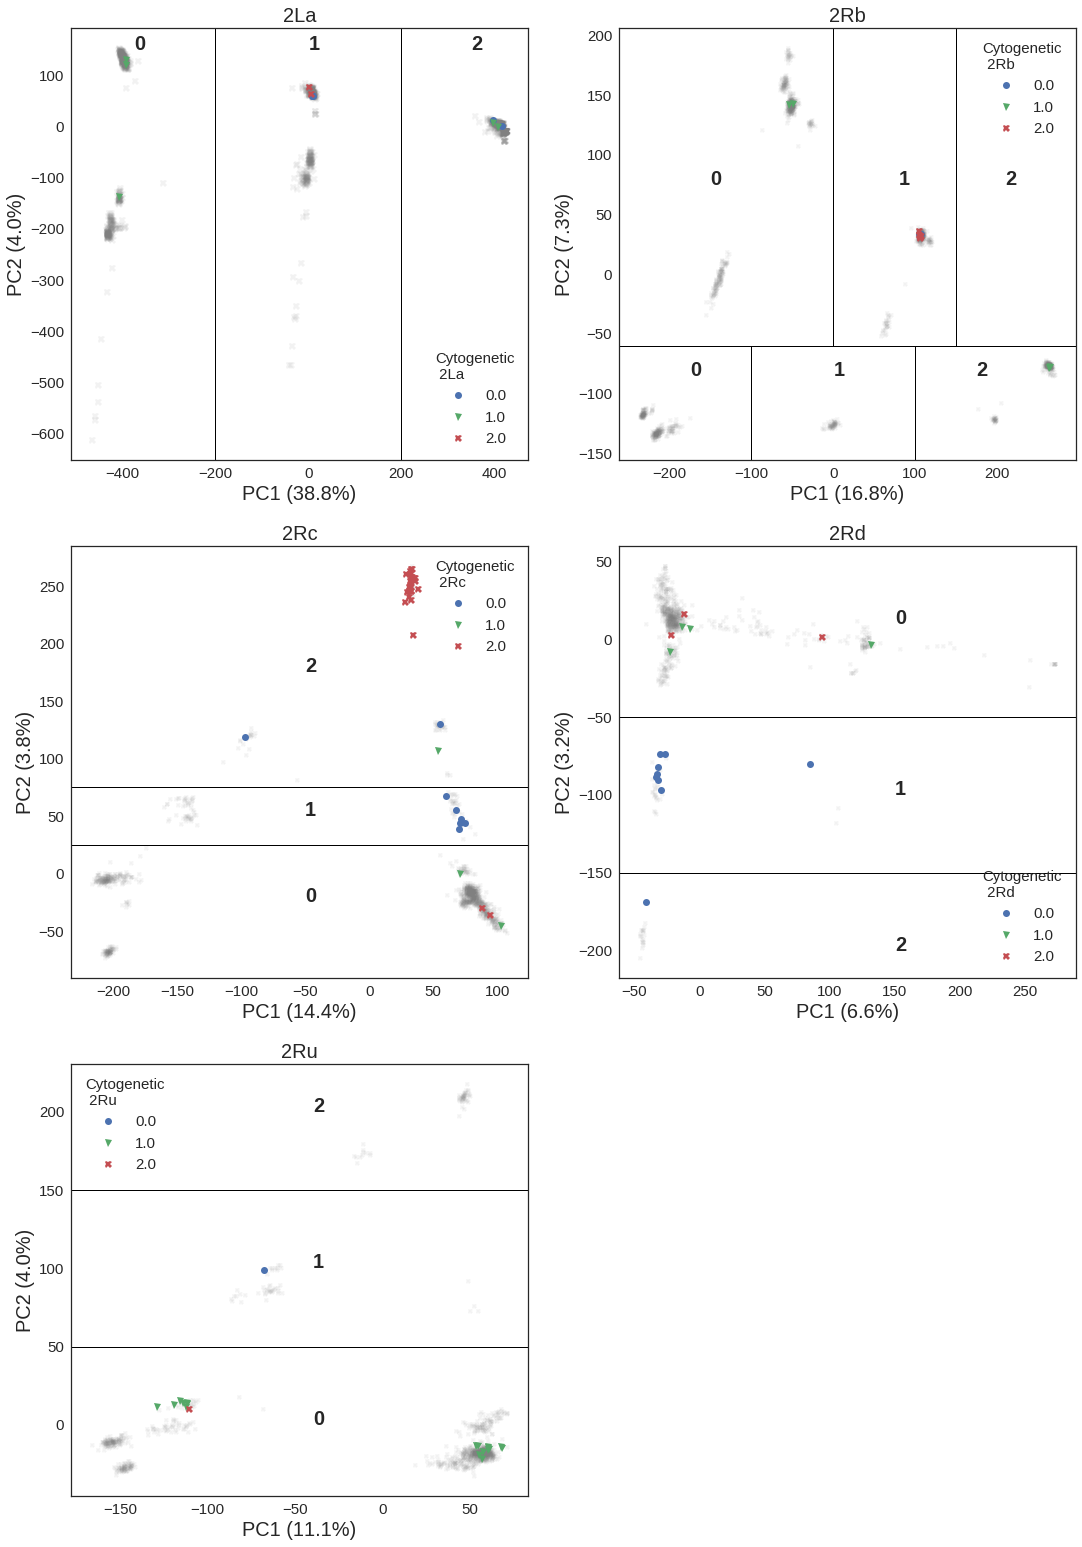

In [123]:
outString = ingenos.make_date_stamp(base + "/data/results/comp_aim1/fig_s3")

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(nrows=3, ncols=2, figsize = (18, 27))
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.tick_params(axis='both', which='major', labelsize=15)

##2La
for index, status in enumerate(md_2La_in["2La"].unique()):
            flt = (md_2La_in["2La"] == status).values
            ax1.plot(coords_2La_in[:,0][flt], 
                    coords_2La_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=7, alpha=0.1)

ingenos.plot_pca_coords(coords_2La_out, model_2La, 0, 1, ax1, md_2La_out,
                region = "2La", label_with = "2La",
               alpha = 1, title = "2La", markersize=7)

ax1.text( -375, 150, "0", fontsize = 20, weight = 'bold')
ax1.text( 0, 150, "1", fontsize = 20, weight = 'bold')
ax1.text( 350, 150, "2", fontsize = 20, weight = 'bold')

ax1.axvline(x = -200, color = 'k', linewidth = 1)
ax1.axvline(x = 200, color = 'k', linewidth = 1)
ax1.set_title("2La", fontsize=20)
ax1.xaxis.label.set_size(20)
ax1.yaxis.label.set_size(20)

legend1 = ax1.legend(title = "Cytogenetic\n 2La", fontsize=15)
legend1.get_title().set_fontsize('15')

##2Rb
for index, status in enumerate(md_2Rb_in["2Rb"].unique()):
            flt = (md_2Rb_in["2Rb"] == status).values
            ax2.plot(coords_2Rb_in[:,0][flt], 
                    coords_2Rb_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.1)

ingenos.plot_pca_coords(coords_2Rb_out, model_2Rb, 0, 1, ax2, md_2Rb_out,
                region = "2Rb", label_with = "2Rb",
               alpha = 1, title = "2Rb", markersize=7)

ax2.text( -150, 75, "0", fontsize = 20, weight = 'bold')
ax2.text( 80, 75, "1", fontsize = 20, weight = 'bold')
ax2.text( 210, 75, "2", fontsize = 20, weight = 'bold')
ax2.text( -175, -85, "0", fontsize = 20, weight = 'bold')
ax2.text( 0, -85, "1", fontsize = 20, weight = 'bold')
ax2.text( 175, -85, "2", fontsize = 20, weight = 'bold')

ax2.axhline(y = -60, color = 'k', linewidth = 1)
ymin, ymax = ax2.get_ylim()
ax2.vlines(-100, ymin, -60, color='k', linewidth = 1)
ax2.vlines(100, ymin, -60, color='k', linewidth = 1)
ax2.vlines(0, ymax, -60, color='k', linewidth = 1)
ax2.vlines(150, ymax, -60, color='k', linewidth = 1)

ax2.set_ylim(bottom=ymin, top=ymax)

ax2.set_title("2Rb", fontsize=20)
ax2.xaxis.label.set_size(20)
ax2.yaxis.label.set_size(20)

legend2 = ax2.legend(title = "Cytogenetic\n 2Rb", fontsize=15)
legend2.get_title().set_fontsize('15')

##2Rc

for index, status in enumerate(md_2Rc_in["2Rc"].unique()):
            flt = (md_2Rc_in["2Rc"] == status).values
            ax3.plot(coords_2Rc_in[:,0][flt], 
                    coords_2Rc_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.1)

ingenos.plot_pca_coords(coords_2Rc_out, model_2Rc, 0, 1, ax3, md_2Rc_out,
                region = "2Rc", label_with = "2Rc",
               alpha = 1, title = "2Rc", markersize=7)

ax3.text( -50, -25, "0", fontsize = 20, weight = 'bold')
ax3.text( -50, 50, "1", fontsize = 20, weight = 'bold')
ax3.text( -50, 175, "2", fontsize = 20, weight = 'bold')

ax3.axhline(y = 75, color = 'k', linewidth = 1)
ax3.axhline(y = 25, color = 'k', linewidth = 1)

ax3.set_title("2Rc", fontsize=20)
ax3.xaxis.label.set_size(20)
ax3.yaxis.label.set_size(20)

legend3 = ax3.legend(title = "Cytogenetic\n 2Rc", fontsize=15)
legend3.get_title().set_fontsize('15')

##2Rd
for index, status in enumerate(md_2Rd_in["2Rd"].unique()):
            flt = (md_2Rd_in["2Rd"] == status).values
            ax4.plot(coords_2Rd_in[:,0][flt], 
                    coords_2Rd_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.1)

ingenos.plot_pca_coords(coords_2Rd_out, model_2Rd, 0, 1, ax4, md_2Rd_out,
                region = "2Rd", label_with = "2Rd",
               alpha = 1, title = "2Rd", markersize=7)

ax4.text( 150, 10, "0", fontsize = 20, weight = 'bold')
ax4.text( 150, -100, "1", fontsize = 20, weight = 'bold')
ax4.text( 150, -200, "2", fontsize = 20, weight = 'bold')

ax4.axhline(y = -50, color = 'k', linewidth = 1)
ax4.axhline(y = -150, color = 'k', linewidth = 1)

ax4.set_title("2Rd", fontsize=20)
ax4.xaxis.label.set_size(20)
ax4.yaxis.label.set_size(20)

legend4 = ax4.legend(title = "\nCytogenetic\n 2Rd", fontsize=15)
legend4.get_title().set_fontsize('15')

##2Ru
for index, status in enumerate(md_2Ru_in["2Ru"].unique()):
            flt = (md_2Ru_in["2Ru"] == status).values
            ax5.plot(coords_2Ru_in[:,0][flt], 
                    coords_2Ru_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.1)

ingenos.plot_pca_coords(coords_2Ru_out, model_2Ru, 0, 1, ax5, md_2Ru_out,
                region = "2Ru", label_with = "2Ru",
               alpha = 1, title = "2Ru", markersize=7)

ax5.text( -40, 0, "0", fontsize = 20, weight = 'bold')
ax5.text( -40, 100, "1", fontsize = 20, weight = 'bold')
ax5.text( -40, 200, "2", fontsize = 20, weight = 'bold')

ax5.axhline(y = 150, color = 'k', linewidth = 1)
ax5.axhline(y = 50, color = 'k', linewidth = 1)

ax5.set_title("2Ru", fontsize=20)
ax5.xaxis.label.set_size(20)
ax5.yaxis.label.set_size(20)

legend5 = ax5.legend(title = "Cytogenetic\n 2Ru", fontsize=15)
legend5.get_title().set_fontsize('15')

##take care of the last blank axis
ax6.axis('off')

plt.savefig(outString);